In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.feature_extraction import image
from skimage import data
from skimage.color import rgb2gray

import matplotlib.image as mpimg

import cv2

# Task 1

In [2]:
array_column_names = []
array_column_names.append('Bag Class')
array_column_names.append('Bag Id')
for i in range (1,167):
    array_column_names.append('Feature ' + str(i))

musk_temp = pd.read_csv(R'C:\Users\ecemnaz.bay\Desktop\Musk1.csv',names=array_column_names)


Started to the task with assigning related column names to arrange the data table.

In [3]:
musk_temp.head(1)

,Bag Class,Bag Id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,1,1,42,-198,-109,-75,-117,11,23,-88,...,-238,-74,-129,-120,-38,30,48,-37,6,30


## Part a 

### Applying PCA to the data

In [17]:
bag_class = musk_temp['Bag Class']
pca = PCA(n_components=2)
pca.fit(musk_temp)
musk_pca = pd.DataFrame(pca.transform(musk_temp),columns=['pca_0','pca_1'])
musk_pca['Bag Class'] = bag_class 
musk_pca_0 = musk_pca[musk_pca['Bag Class'] == 0]
musk_pca_1 = musk_pca[musk_pca['Bag Class'] == 1]
musk_pca.head()

,pca_0,pca_1,Bag Class
0,118.596095,750.559842,1
1,133.475554,757.604704,1
2,52.793109,730.619432,1
3,202.184668,798.434974,1
4,146.956832,760.248054,1


### Applying MDS to the data 

In [27]:
mds = MDS(n_components=2,random_state=42)
mds_array = mds.fit_transform(musk_temp)
musk_mds = pd.DataFrame(mds_array,columns=['mds_0','mds_1'])
musk_mds['Bag Class'] = bag_class 
musk_mds_0 = musk_mds[musk_mds['Bag Class'] == 0]
musk_mds_1 = musk_mds[musk_mds['Bag Class'] == 1]
musk_mds.head()

,mds_0,mds_1,Bag Class
0,539.976128,805.484034,1
1,598.809326,851.824035,1
2,-855.998542,-576.128507,1
3,-1017.489784,-526.661755,1
4,469.611880,786.212187,1


### Ploting the Figures 

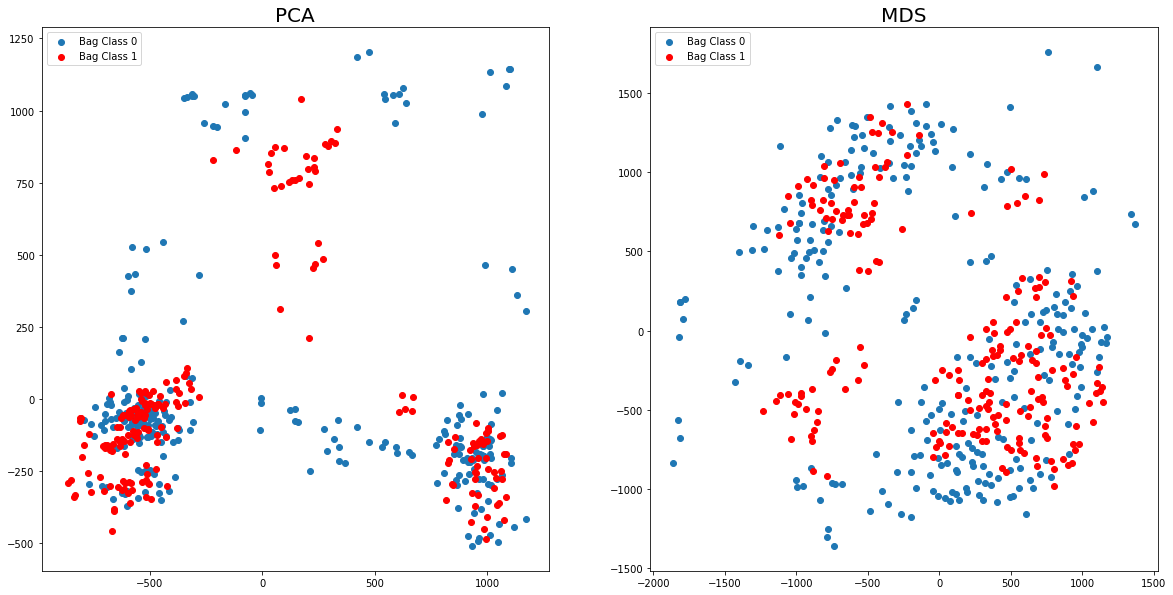

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(musk_pca_0['pca_0'],musk_pca_0['pca_1'])
plt.scatter(musk_pca_1['pca_0'],musk_pca_1['pca_1'], c='red')
plt.legend(loc='upper left', labels=['Bag Class 0','Bag Class 1'])
plt.title('PCA',loc='center',size=20)

plt.subplot(122)
plt.scatter(musk_mds_0['mds_0'],musk_mds_0['mds_1'])
plt.scatter(musk_mds_1['mds_0'],musk_mds_1['mds_1'], c='red')
plt.legend(loc='upper left', labels=['Bag Class 0','Bag Class 1'])
plt.title('MDS',loc='center',size=20)

plt.show()

In [29]:
print(pca.explained_variance_ratio_)
print(mds.stress_)

[0.40623208 0.12974608]
16581113919.489416


PCA seeks a linear combination of variables such that the maximum variance is extracted from the variables. It then removes this variance and seeks a second combination which explains the maximum proportion of the remaining variance. It continues until finding somehow uncorrelated factors. Explained variance ratio is the percentage of variance explained by each of the selected components. In our case these values are 0.40623208 and 0.12974608 respectively. Which means, the remaining total variance has been distributed between components according to these ratio. Yet, as we reduced the dimension to 2, there is a certain loss of variance information. 

Purpose of multidimensional scaling (MDS) is to provide a visual representation of the pattern of similarities or distances among a set of objects. MDS seeks for a set of vectors in p-dimensional space such that the matrix of euclidean distances among them. Stress can be interpreted as a measure for goodness of fit in MDS. It measures the difference between the observed dissimilarity matrix and the estimated one. The lower the stress shows the better the fit.


## Part b 

### Applying PCA and MDS to Bag Level Information 

In [33]:
pca_mean = PCA(n_components=2)
mds_mean = MDS(n_components=2, random_state=42)

musk_mean = pd.DataFrame(columns = musk_temp.columns)
musk_mean.head()
for i in range(1,93):
    musk_mean.loc[i-1] = (musk_temp[musk_temp['Bag Id'] == i].mean().data)
musk_mean.head(1)

C:\Users\ecemnaz.bay\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Series.data is deprecated and will be removed in a future version
  import sys


,Bag Class,Bag Id,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,...,Feature 157,Feature 158,Feature 159,Feature 160,Feature 161,Feature 162,Feature 163,Feature 164,Feature 165,Feature 166
0,1.0,1.0,42.0,-194.5,-125.75,-70.0,-117.0,33.0,36.0,-128.5,...,-238.0,-187.75,-34.0,-120.0,-38.5,30.25,48.0,-37.0,5.5,30.25


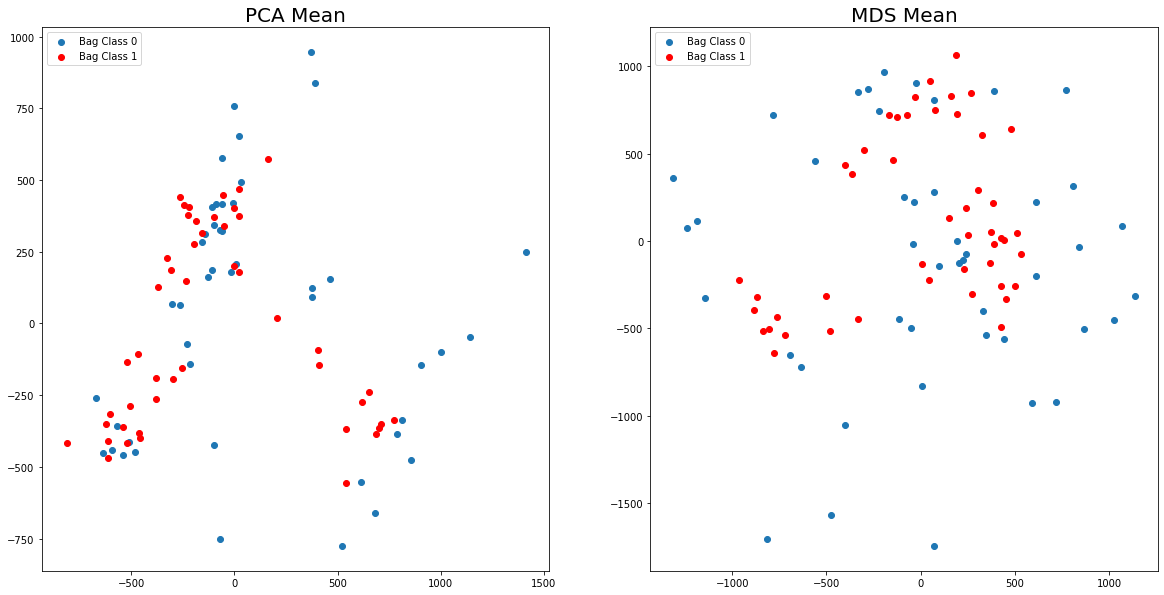

In [34]:
bag_class_mean = musk_mean['Bag Class']

pca_mean.fit(musk_mean)
musk_mean_pca = pd.DataFrame(pca_mean.transform(musk_mean),columns=['pca_0','pca_1'])
musk_mean_pca['Bag Class'] = bag_class_mean 
musk_mean_pca_0 = musk_mean_pca[musk_mean_pca['Bag Class'] == 0]
musk_mean_pca_1 = musk_mean_pca[musk_mean_pca['Bag Class'] == 1]

mds_array = mds_mean.fit_transform(musk_mean)
musk_mean_mds = pd.DataFrame(mds_array,columns=['mds_0','mds_1'])
musk_mean_mds['Bag Class'] = bag_class_mean 
musk_mean_mds_0 = musk_mean_mds[musk_mean_mds['Bag Class'] == 0]
musk_mean_mds_1 = musk_mean_mds[musk_mean_mds['Bag Class'] == 1]

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(musk_mean_pca_0['pca_0'],musk_mean_pca_0['pca_1'])
plt.scatter(musk_mean_pca_1['pca_0'],musk_mean_pca_1['pca_1'], c='red')
plt.legend(loc='upper left', labels=['Bag Class 0','Bag Class 1'])
plt.title('PCA Mean',loc='center',size=20)

plt.subplot(122)
plt.scatter(musk_mean_mds_0['mds_0'],musk_mean_mds_0['mds_1'])
plt.scatter(musk_mean_mds_1['mds_0'],musk_mean_mds_1['mds_1'], c='red')
plt.legend(loc='upper left', labels=['Bag Class 0','Bag Class 1'])
plt.title('MDS Mean',loc='center',size=20)

plt.show()

In [35]:
print(pca_mean.explained_variance_ratio_)
print(mds_mean.stress_)

[0.32304776 0.21451621]
276980218.4085592


In this part we have less data points as we summarised our data by by taking the center of information as the representation. When PCA applied to the summary data, we see that the explained variance ratio values get closer to each other. That result shows us the variance distributed between components more balanced. Thus we can say that the importance we put on the first component to explain variance, has been decreased. 
Also, the stress value gets smaller when we use the summary data. We can also interpret that result as a better fit.

## Part c 

Aim of summarizing the data is mainly simplfying it to find out what looks normal and what looks odd. 

The distribution of a variable shows what values the variable takes and how often the variable takes these values.

These information can be found by describing :
1- The center of the data. Which is also called as "measure of central tendency".
2- The spread of the values around the center. Which is also called as "measure of dispersion".

Measure of dispersion gives us insights about the amount of variation, or diversity, within the data. 
We can utilize measure of central tendency better to have a representation of our bags.    

In part b we used mean values to describe the center of the data. For the same manner we can use the most frequently repeated value (mode), or the value in the middle of all the other numbers in a data set (median).

For having better results, we can detect outliers within the data before calculating either mean, median or mode. Eliminating these outliers from our bags will help us to get better representations. 

# Task 2 

## Part 1

Open cv library reads images in BGR format as defatult. thus, we need to convert the image to RGB after importing.

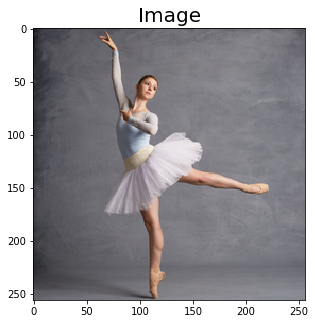

In [12]:
img = cv2.imread(R'C:\Users\ecemnaz.bay\Desktop\dancer.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.title('Image',size=20)
plt.show()

## Part 2

###  2.a

We should calculate noise for each channel seperately and add to the original image to create the noisy image.

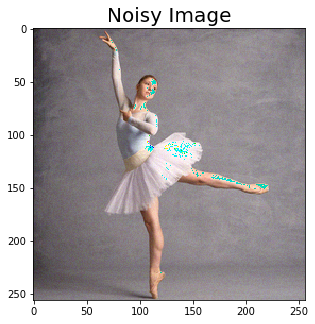

In [13]:
R, G, B = cv2.split(img)
noise_R = np.random.uniform(R.min(),R.max()*0.1,R.size)
noise_R.shape = (256,256)
noise_R = R + noise_R
noise_G = np.random.uniform(G.min(),G.max()*0.1,G.size)
noise_G.shape = (256,256)
noise_G = G + noise_G
noise_B = np.random.uniform(B.min(),B.max()*0.1,B.size)
noise_B.shape = (256,256)
noise_B = B + noise_B 

noisy_image = img.copy()

noisy_image[:, :, 0] = noise_R
noisy_image[:, :, 1] = noise_G
noisy_image[:, :, 2] = noise_B

plt.figure(figsize=(5,5))
plt.imshow(noisy_image)
plt.title('Noisy Image',size=20)
plt.show()

### 2.b 

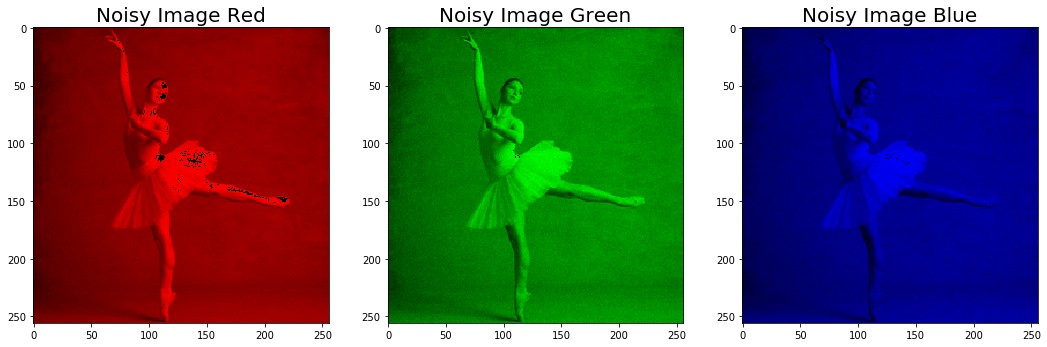

In [14]:
red_img = noisy_image.copy()
red_img[:,:,1] = 0
red_img[:,:,2] = 0

green_img = noisy_image.copy()
green_img[:,:,0] = 0
green_img[:,:,2] = 0

blue_img = noisy_image.copy()
blue_img[:,:,0] = 0
blue_img[:,:,1] = 0

plt.figure(figsize=(18, 18))

plt.subplot(131)
plt.imshow(red_img)
plt.title('Noisy Image Red',size=20)

plt.subplot(132)
plt.imshow(green_img)
plt.title('Noisy Image Green',size=20)

plt.subplot(133)
plt.imshow(blue_img)
plt.title('Noisy Image Blue',size=20)

plt.show()

## Part 3

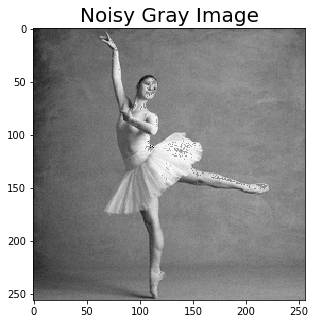

In [15]:
noisy_gray_image = cv2.cvtColor(noisy_image, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(5,5))
plt.imshow(noisy_gray_image,cmap='gray')
plt.title('Noisy Gray Image',size=20)
plt.show()


In [16]:
noisy_gray_image_patches = image.extract_patches_2d(noisy_gray_image,(25, 25))

### 3.a & 3.b

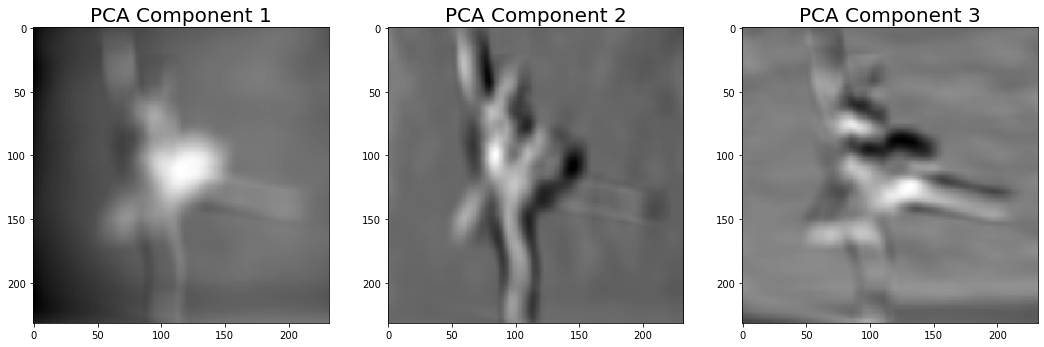

[0.62558343 0.06129221 0.04688383]


In [17]:
noisy_gray_image_patches_reshaped = noisy_gray_image_patches.reshape(noisy_gray_image_patches.shape[0],-1)
pca2 = PCA(n_components=3)
noisy_gray_image_patches_std = pca2.fit_transform(noisy_gray_image_patches_reshaped)

plt.figure(figsize=(18, 18))

plt.subplot(131)
plt.imshow(noisy_gray_image_patches_std[:,0].reshape(232,232),cmap='gray')
plt.title('PCA Component 1',size=20)

plt.subplot(132)
plt.imshow(noisy_gray_image_patches_std[:,1].reshape(232,232),cmap='gray')
plt.title('PCA Component 2',size=20)

plt.subplot(133)
plt.imshow(noisy_gray_image_patches_std[:,2].reshape(232,232),cmap='gray')
plt.title('PCA Component 3',size=20)

plt.show()
print(pca2.explained_variance_ratio_)

Explained variance ratio of components are 0.42157044 , 0.06115716 , 0.02831466 respectively. In PCA, the first component holds the most of the variance information. That's why we see that component 1 represents noisy gray image better than other components. Also we can converge to the noisy gray image by mutltiplying and summing up the components with some coefficients.

### 3.c

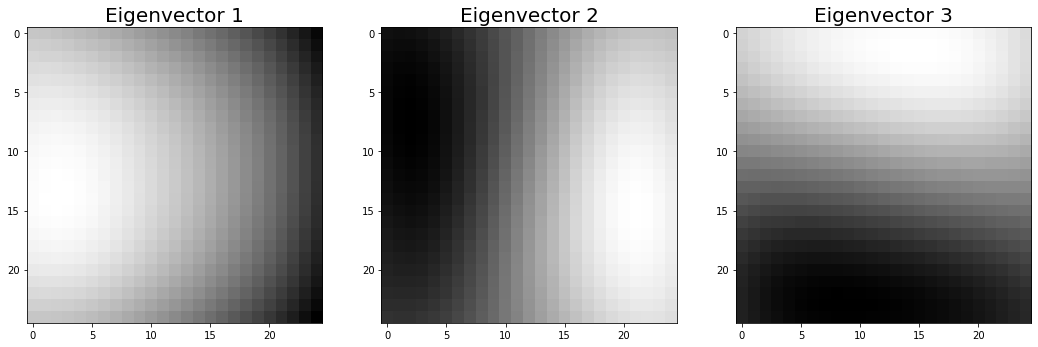

In [18]:
plt.figure(figsize=(18, 18))

plt.subplot(131)
plt.imshow(pca2.components_[0].reshape(25,25),cmap='gray')
plt.title('Eigenvector 1',size=20)

plt.subplot(132)
plt.imshow(pca2.components_[1].reshape(25,25),cmap='gray')
plt.title('Eigenvector 2',size=20)

plt.subplot(133)
plt.imshow(pca2.components_[2].reshape(25,25),cmap='gray')
plt.title('Eigenvector 3',size=20)

plt.show()